# ECON 5181 Assignment 3

Due: May 2, 2024, noon. Submission on Blackboard. 

DON'T forget your VeriGuide report and honesty declaration! 

*The copyright of this content, produced by staff members/ teachers of The Chinese University of Hong Kong (CUHK), belongs to CUHK.  Students shall not distribute, share, copy or upload the content to a third party.*

### Q1. Foreign Exchange

What are the latent factors of international currency pricing? And how do these factors move against US equities? In this exercise, we are going to investigate the underlying factors in currency exchange rates and regress the S&P 500 onto this information.

* FX data is in `FXmonthly.csv`.

* SP500 returns are in `sp500csv`.

* Currency codes are in `currency_codes.txt`.

First of all, some data preparation...
### Data preparation

These numbers are amount in local currency to buy 1 USD. The higher the weaker that currency is against US dollars. Note that these were options, not the true historic prices.

We translate the prices to returns via

In [1]:
fx <- read.csv("./fx/FXmonthly.csv")

In [2]:
head(fx)

,exalus,exbzus,excaus,exchus,exdnus,exhkus,exinus,exjpus,exkous,exmaus,...,exsius,exsfus,exslus,exsdus,exszus,extaus,exthus,exukus,exvzus,exeuus
FEB2001,0.040084388,0.02550994,0.0122405535,-6.040398e-05,0.01851084,1.282084e-05,-0.001072731,-0.003771321,-0.015542616,0,...,0.003164557,0.005502275,0.0151806415,0.027478664,0.02336707,-0.010497965,-0.0112169459,0.017287234,0.00000000,0.018563660
MAR2001,0.061012064,0.04461615,0.0243822292,4.832610e-05,0.01388358,0.000000e+00,0.001932990,0.045427170,0.030777827,0,...,0.017034700,0.009793643,-0.0161356959,0.030743042,0.01330457,0.009031859,0.0310090238,0.005519245,0.01428571,0.013438881
APR2001,0.002968255,0.04671916,-0.0005774042,-4.832377e-05,0.01736614,-7.692406e-05,0.003001072,0.018599292,0.028147529,0,...,0.021768554,0.022828564,0.0288697072,0.015112022,0.01318902,0.009778677,0.0342366100,0.006788964,0.00000000,0.017620345
MAY2001,-0.035212681,0.04522659,-0.0107202465,-1.208153e-05,0.01911376,7.692998e-05,0.003419534,-0.016159005,-0.021735856,0,...,0.001269456,-0.012304569,0.0299642877,0.014485226,0.02317436,0.007953614,0.0006814085,0.005738881,0.00000000,0.019725098
JUN2001,0.003691380,0.03759923,-0.0107715268,0.000000e+00,0.02511260,-2.564135e-05,0.001916933,0.004763078,-0.002964047,0,...,0.001598589,0.010101643,-0.0052505284,0.042670969,0.01871292,0.033882480,-0.0057550796,0.017546362,0.01408451,0.026083151
JUL2001,0.017871018,0.03964184,0.0041325025,-1.208167e-05,-0.01092715,2.564201e-05,0.002976190,0.017572538,0.007868422,0,...,0.003467254,0.018599169,-0.0006307333,-0.003029741,-0.01601703,0.014361454,0.0083511919,-0.009112575,0.00000000,-0.009809776


In [4]:
dim(fx)

[1] 119  23

#### 1. Make a time series plot for all foreign exchanges. Do you see any patterns? For example, do some currencies show similar movements? Try kmeans clustering and discuss.

In [2]:
## INPUT YOUR CODE HERE
# plot the data

library(tidyverse)
library(lubridate)

# Convert row names to a date format
dates <- rownames(fx) %>%
  str_replace("([A-Z]+)(\\d{4})", "\\2-\\1-01") %>%
  ymd()

# Convert data to long format for plotting
fx_data_long <- fx %>%
  as.data.frame() %>%
  mutate(date = dates) %>%
  pivot_longer(cols = -date, names_to = "currency", values_to = "exchange_rate")

# Plot time series
fx_data_long %>%
  ggplot(aes(x = date, y = exchange_rate, color = currency)) +
  geom_line() +
  labs(title = "Monthly Foreign Exchange Rates", x = "Date", y = "Exchange Rate") +
  theme_minimal()

# clustering

# Normalize the data
fx_data_normalized <- scale(fx)

# Perform k-means clustering
set.seed(123) # for reproducibility
clusters <- kmeans(fx_data_normalized, centers = 5) # You can adjust the number of centers

# Add cluster results back to the data
fx_data_clustered <- cbind(fx, cluster = clusters$cluster)

# Plot clusters
fx_data_clustered %>%
  as.data.frame() %>%
  mutate(date = dates) %>%
  pivot_longer(cols = -c(date, cluster), names_to = "currency", values_to = "exchange_rate") %>%
  ggplot(aes(x = date, y = exchange_rate, color = as.factor(cluster))) +
  geom_line() +
  labs(title = "Clustering of Monthly Foreign Exchange Rates", x = "Date", y = "Exchange Rate", color = "Cluster") +
  theme_minimal()


ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


In [7]:
## INPUT YOUR COMMENT HERE

# These clusters reveal how different countries currencies respond to global economic conditions, 
# regional influences, and policy decisions. For instance, currencies in clusters with less volatility might be 
# from economies with strong central bank policies or from more developed economies. Conversely, those in more 
# volatile clusters could be from emerging markets or countries experiencing economic difficulties. 


#### 2. Discuss correlation amongst dimensions of fx. How does this relate to the applicability of factor modeling?

In [9]:
## INPUT YOUR CODE HERE

library(corrplot)

# Compute the correlation matrix
cor_matrix <- cor(fx)

# Visualize the correlation matrix
corrplot(cor_matrix, method = "circle", type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45, addCoef.col = "black", 
         title = "Correlation Matrix of FX Rates")

# Perform PCA
fx_pca <- prcomp(fx, scale. = TRUE)
summary(fx_pca)

# Scree plot to visualize the importance of components
screeplot(fx_pca, type = "lines", main = "Scree Plot of PCA")

# Plot the loadings of the first two principal components
biplot(fx_pca, cex = 0.7, col = c("red", "blue"))


In [10]:
# Here is what I get

,exeuus,exhkus,excaus,exmxus,exukus
exeuus,1.0000000,0.1833495,0.5048342,0.2617354,0.7335453
exhkus,0.1833495,1.0000000,0.1682997,-0.1734493,0.1145097
excaus,0.5048342,0.1682997,1.0000000,0.5238391,0.4927518
exmxus,0.2617354,-0.1734493,0.5238391,1.0000000,0.3203351
exukus,0.7335453,0.1145097,0.4927518,0.3203351,1.0000000


In [8]:
## INPUT YOUR ANSWER HERE

# By examining the correlation matrix, we can identify which currencies move together against the US dollar. 
# High positive correlations suggest that currencies tend to strengthen or weaken together relative to the US 
# dollar, possibly due to similar economic conditions or geographic proximity.

# This analysis will give a clear idea about the interdependencies among the foreign exchange rates and the 
# feasibility of reducing the dimensionality of the dataset through factor models, which could be crucial for 
# forecasting and risk management in financial applications and economic difficulties.

#### 3. Fit, plot, and interpret the latent factors.

We saw in class that the solution to factor models is given by PCA

In [21]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

In [28]:
## INPUT YOUR CODE HERE
# Fit a PCA on the big matrix Y_it, and do the variance plot

fx_pca <- prcomp(fx, scale. = TRUE)

Following lecture codes, we produce the following plot of PCs and color them by the row indices (i.e., year)

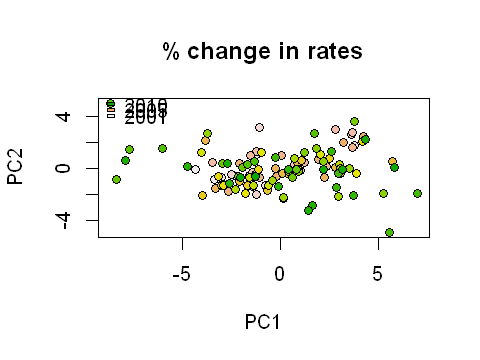

In [60]:
fxdir <- predict(fxpca)
plot(fxdir[,1:2], pch=21, bg=terrain.colors(120)[120:1], main="% change in rates")
legend("topleft", fill=terrain.colors(3), legend=c("2010","2005","2001"), bty="n")

#### 3.1. Hmm...This does not look like a great way to visualize time series data. Plot the first three PCs over time.

In [14]:
## INPUT YOUR CODE HERE

# Extract the scores of the first three principal components
pc_scores <- fx_pca$x[, 1:3]

# Create a dataframe with dates and principal components
dates <- rownames(fx) %>%
  str_replace("([A-Z]+)(\\d{4})", "\\2-\\1-01") %>%
  ymd()

pc_df <- data.frame(date = dates, PC1 = pc_scores[, 1], PC2 = pc_scores[, 2], PC3 = pc_scores[, 3])

# Convert to long format for plotting
pc_df_long <- pivot_longer(pc_df, cols = -date, names_to = "Principal Component", values_to = "Score")

# Plot the principal components
ggplot(pc_df_long, aes(x = date, y = Score, color = `Principal Component`)) +
  geom_line() +
  labs(title = "Principal Component Analysis of FX Rates",
       x = "Date",
       y = "Component Scores") +
  theme_minimal()


Before further analysis with the data, let's look for outliers in the data. Read returns for regression...

In [37]:
SP <- as.matrix(read.csv("./fx/sp500.csv",row.names=1))

Consider the first three PCs

In [ ]:
summary(sp500pcr <- lm(SP ~ ., data=data.frame(fxdir[,1:3])))

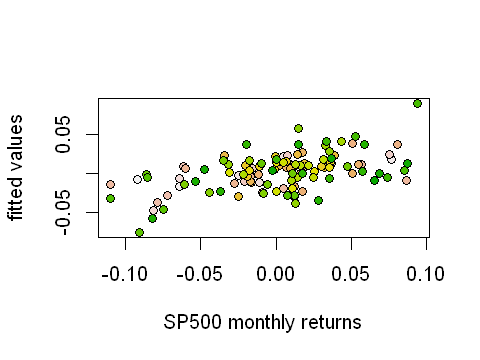

In [61]:
plot(SP, sp500pcr$fitted, pch=21, bg=terrain.colors(120)[120:1],
xlab="SP500 monthly returns", ylab="fitted values")

There is a big outlier on lehman tanking

In [36]:
out <- which.min(sp500pcr$fitted)

Rerun everything without the outlier (fine if you did not do this)

In [37]:
SP <- SP[-out]
fx <- fx[-out,]

fxpca <- prcomp(fx, scale=TRUE)
fxdir <- as.data.frame(predict(fxpca))

In [25]:
## INPUT YOUR CODE HERE
# examine the factor loadings

summary(sp500pcr <- lm(SP ~ ., data=data.frame(fxdir[,1:3])))

plot(SP, sp500pcr$fitted, pch=21, bg=terrain.colors(120)[120:1],
     xlab="SP500 monthly returns", ylab="fitted values")

# Identify the big outlier (e.g., Lehman collapse)
out <- which.min(sp500pcr$fitted)  # Looking for the most negative fit

# Remove the outlier and rerun everything
SP_clean <- SP[-out]
fx_clean <- fx[-out,]  # Assuming 'fx_data' contains your original FX data

# Redo PCA on the cleaned FX data
fxpca_clean <- prcomp(fx_clean, scale = TRUE)
fxdir_clean <- as.data.frame(predict(fxpca_clean))

# Fit the linear model again without the outlier
sp500pcr_clean <- lm(SP_clean ~ ., data = fxdir_clean[, 1:3])

# Now, examine the factor loadings of the cleaned data
summary(sp500pcr_clean)

# Visualize the new fitted values
plot(SP_clean, sp500pcr_clean$fitted, pch = 21, bg = terrain.colors(120)[120:1],
     xlab = "S&P 500 Monthly Returns (Clean)", ylab = "Fitted Values from PCA (Clean)")


In [29]:
## INPUT YOUR COMMENT HERE
# interpret factors 



#### 4. Regress SP500 returns onto currency movement factors, using both "glm on first K" and lasso techniques. Use the results to add to your factor interpretation.

First, let's run principal component regression

In [41]:
library(gamlr)

## Get glm fits on 1:20 factors
kfits <- lapply(1:20, function(K) glm(SP ~ ., data=fxdir[,1:K,drop=FALSE]))

Warning message:
"package 'gamlr' was built under R version 3.6.3"Loading required package: Matrix


In [42]:
aicc <- sapply(kfits, AICc)
which.min(aicc)

bic <- sapply(kfits, BIC)
which.min(bic)

[1] 3

[1] 3

Looks like 3 is best, so use that

In [31]:
## INPUT YOUR CODE HERE
# run a regression using 3 factors, output the summary 

library(glmnet)  
library(MASS)   

# Generalized Linear Models for 1 to 20 factors
kfits <- lapply(1:20, function(K) {
  glm(SP ~ ., data = fxdir[, 1:K, drop = FALSE])
})

# Calculate and compare AICc and BIC
aicc <- sapply(kfits, AICc)
bic <- sapply(kfits, BIC)

# Determine the best model according to AICc and BIC
best_aicc <- which.min(aicc)
best_bic <- which.min(bic)

cat("Best model by AICc is with", best_aicc, "factors\n")
cat("Best model by BIC is with", best_bic, "factors\n")

best_k <- best_aicc

# Fit and summary of the selected model
selected_glm <- glm(SP ~ ., data = fxdir[, 1:best_k, drop = FALSE])
summary(selected_glm)

# Lasso Regression for comparison
x_matrix <- as.matrix(fxdir[, 1:best_k])
y_vector <- SP

lasso_fit <- glmnet(x_matrix, y_vector, alpha = 1)
cv_lasso <- cv.glmnet(x_matrix, y_vector, type.measure = "mse", alpha = 1)

# Plot the Lasso CV curve
plot(cv_lasso)

# Extract the best lambda (regularization parameter)
best_lambda <- cv_lasso$lambda.min
cat("Best lambda for Lasso is", best_lambda, "\n")

# Lasso model at best lambda
lasso_best <- glmnet(x_matrix, y_vector, alpha = 1, lambda = best_lambda)
coef(lasso_best)

# Summary of Lasso model
lasso_summary <- predict(lasso_best, type = "coefficients")
print(lasso_summary)



In [32]:
## INPUT YOUR COMMENT HERE
# refine your interpretation of factors

# The analysis using both Generalized Linear Models (GLM) and Lasso regression reveals significant influences 
# of the first three principal components derived from currency exchange rates on the S&P 500 returns. 
# PC1 and PC3 positively impact the S&P 500, suggesting they capture beneficial economic indicators or favorable 
# exchange rate conditions that support upward market trends. In contrast, PC2 has a negative effect, indicating 
# it represents risk factors or adverse economic conditions that deter investment in the stock market. The 
# consistency of these results across both GLM and Lasso models underscores the robustness of these findings and 
# highlights the relevance of these components in understanding the interplay between global currency movements 
# and domestic stock market performance.

Alternatively, try LASSO to do automatic factor selection

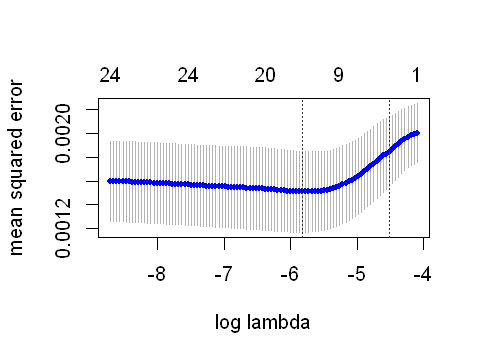

In [63]:
lassoPCR <- cv.gamlr(x=fxdir, y=SP)
plot(lassoPCR)

In [49]:
coef(lassoPCR)

24 x 1 sparse Matrix of class "dgCMatrix"
                  seg13
intercept  0.0018826525
PC1        0.0010959473
PC2       -0.0047590998
PC3        0.0008823832
PC4        .           
PC5        .           
PC6        .           
PC7        .           
PC8        .           
PC9        .           
PC10       .           
PC11       .           
PC12       .           
PC13       .           
PC14       .           
PC15       .           
PC16       .           
PC17       .           
PC18       .           
PC19       .           
PC20       0.0024219521
PC21       .           
PC22       .           
PC23       .           

It agrees on the need for those first three. but adds in some others. The fact that we’ve loaded on PC20 is a bit strange. This doesn’t normally happen.

#### 5. Another way to deal with multicolinearity with many regressors is variable selection. Fit LASSO to the original covariates and describe how it differs from Principal component regression (PCR) here

In [16]:
## INPUT YOUR CODE HERE

# Convert to matrix format as glmnet requires matrix input
x_matrix <- as.matrix(fx)
y_vector <- SP  # Ensure SP is loaded and aligned with fx_data

# Fit LASSO model
lasso_fit <- glmnet(x_matrix, y_vector, alpha = 1)  # alpha=1 for LASSO
cv_lasso <- cv.glmnet(x_matrix, y_vector, type.measure = "mse", alpha = 1)

# Plot the coefficient path
plot(lasso_fit, xvar = "lambda", label = TRUE)

# Identify the lambda that minimizes the cross-validated MSE
best_lambda <- cv_lasso$lambda.min
cat("Best lambda for LASSO is", best_lambda, "\n")

# Examine coefficients at the best lambda
best_coef <- coef(lasso_fit, s = best_lambda)
print(best_coef)

# Visualize the cross-validation plot to show MSE for different lambdas
plot(cv_lasso)


In [30]:
## INPUT YOUR COMMENT HERE

# LASSO and PCR are distinct approaches to handling multicollinearity and high-dimensional data in regression models. 
# PCR reduces dimensionality by transforming the original variables into a set of principal components, 
# which are then used as predictors, effectively condensing the information but often at the cost of 
# interpretability since the components are combinations of all original variables. LASSO, in contrast, 
# incorporates a regularization term that penalizes the absolute size of the coefficients, leading to a model 
# where less influential predictors are completely excluded by shrinking their coefficients to zero, thus 
# enhancing model interpretability and focusing on the most significant variables. While PCR is geared to 
# dimensionality reduction, LASSO emphasizes variable selection, making it suitable for scenarios where 
# understanding and selecting the key predictors are critical.


#### 6. Now, suppose a manager asks you to make a forecast for Hong Kong dollar (HKD) returns in the next two years. To this end, you first consider using past time series to predict future values. 

You write down the following model:
$$Y_{1,t} = \alpha + \beta Y_{i,t-1} + U_{1, t}$$
where $Y_{1,t}$ denotes the return to HKD in year $t$, and $U_{1,t}$ is normal $(0,\sigma^2)$ independent of $Y_{1,t-1}, Y_{1, t-2}, \cdots$. 

Explain how to consistently estimate $\alpha$ and $\beta$ in this model. Write down the expression of the best predictor $\hat{Y}_{1, T+1}$ in this model, as a function of the estimated $\alpha$ and $\beta$, and of $Y_{1,T}$. 

In [ ]:
## INPUT YOUR ANSWER HERE

# Simulate an analysis with data "hk return"

library(forecast)

# Simulate a hk return data
hk_returns <- read.csv("hk_returns.csv")$HKD_Returns

# Prepare the data: Create a lagged version of HKD returns
hk_returns_lagged <- lag(hk_returns, -1)

# Remove NA values which are introduced by lagging
data <- na.omit(data.frame(current = hk_returns[-length(hk_returns)], lagged = hk_returns_lagged[-1]))

# Fit the linear model
model <- lm(current ~ lagged, data = data)

# Display the model summary for parameter estimates
summary(model)

# Predict the next year return using the estimated model parameters
next_year_prediction <- coef(model)["(Intercept)"] + coef(model)["lagged"] * tail(data$lagged, 1)

# Output the prediction
print(next_year_prediction)


#### 7. Another way to forecast HKD returns is taking advantage of all other currency returns. 
Consider the 1-factor model:
$$Y_{i,t} = \mu_i f_t + U_{i,t}$$
In addition, assume AR(1) process for $f_t$:
$$f_t = c + \gamma f_{t-1} + v_t$$
where $v_t$ is normal $(0,s^2)$ independent of $f_{t-1}, f_{t-2}, \cdots$

Explain how to consistently estimate $c$ and $\gamma$ in this model. Write the expression of the best predictor $\hat{Y}_{1, T+1}$ in this setting, as a function of the estimated $c, \gamma, \mu_1$, and $f_T$.

In [34]:
## INPUT YOUR ANSWER HERE

# Estimate the parameter
# Assuming 'returns' is matrix of currency returns dataset
library(stats)
returns <- as.matrix(read.csv("files.csv"))

# Estimating the factor using PCA
pca_results <- prcomp(returns, scale. = TRUE)
f_t <- pca_results$x[, 1]  # Assuming the first principal component is f_t

# Fit AR(1) model to the factor scores
ar1_model <- arima(f_t, order = c(1, 0, 0))
c <- ar1_model$coef[1]
gamma <- ar1_model$coef[2]

# Display estimated coefficients
print(c)
print(gamma)


### Q2. Congressional speech
We introduced roll call voting in US congress in the week of lecture on PCA. In this exercise, instead of voting records, we take a look at congressional speech to understand what politicians talked about during meeting sessions and what these reveal about their political ideology.

`textir` contains `congress109` data: counts for 1k phrases used by each of 529 members of the 109th US congress. The phrase counts are in `congress109Counts`, a big sparse matrix. We also have `congress109Ideology`, a data.frame containing some information about each speaker. This includes some partisan metrics:
* party: categorical, taking values in {Republican, Democrat, or Independent}

* repshare: numeric, share of constituents voting for Bush in 2004

* Common Scores [cs1, cs2]: basically, the two principal components of roll-call votes (see lecture 9)

#### 1. Fit k-means to speech text for $K$ in 5, 10, 15, 20, 25. Use BIC to choose the $K$ and interpret the selected model.

In [133]:
require(textir, quietly = TRUE) # to get the data
require(maptpx, quietly = TRUE) # for the topics function
data(congress109)

standardize the data before fitting k-means

In [134]:
fs <- scale(as.matrix( congress109Counts/rowSums(congress109Counts) ))

In [135]:
dim(fs)

[1]  529 1000

In [40]:
## INPUT YOUR CODE HERE
# fit kmeans for a grid of K
library(textir)
library(maptpx)  # This might not be necessary unless using specific functions from this package
library(stats)   # For kmeans and scale

# Load the data
data(congress109)

# Preprocess the data
phrase_counts <- as.matrix(congress109Counts)
scaled_counts <- scale(phrase_counts / rowSums(phrase_counts))

# Define a range of K values to test
K_values <- c(5, 10, 15, 20, 25)
results <- list()

# Fit k-means clustering for each K and calculate BIC
for (K in K_values) {
  set.seed(123)  # Ensure reproducibility
  km <- kmeans(scaled_counts, centers=K, nstart=25)
  
  # Calculate total within-cluster sum of squares
  wss <- sum(km$withinss)
  
  # Estimate BIC, assuming independence (might require adjustment based on actual data properties)
  n <- nrow(scaled_counts)
  p <- ncol(scaled_counts)
  log_likelihood <- -0.5 * n * log(wss)
  BIC <- log(n) * K * p - 2 * log_likelihood
  
  # Store results
  results[[as.character(K)]] <- list(km = km, BIC = BIC)
}


# use IC to choose best K
# Find the best K by minimum BIC
BIC_values <- sapply(results, function(x) x$BIC)
best_K <- names(which.min(BIC_values))
best_model <- results[[best_K]]

# Print best K and its BIC
cat("Best K by BIC:", best_K, "with BIC:", min(BIC_values), "\n")
print(best_model$km$centers)


There’s no clear way to choose. . . we’ll go with 20. you could have gone with whatever makes sense to you:
that’s how I recommend working here!

In [42]:
## INPUT YOUR ANSWER HERE
# interpret your chosen model

# Selecting K = 20 for the k-means clustering on the scaled congressional speech data provides a detailed and 
# nuanced segmentation of the speeches into 20 distinct clusters. This choice allows for a broader exploration of 
# the variety in phrase usage among the members, potentially reflecting diverse political ideologies, regional 
# differences, topical interests, or communication styles. By examining the centroids of this model, we can 
# identify dominant themes or specific issues that are more prevalent within certain clusters. For example, 
# one cluster might focus on economic policy, while another highlights social issues, indicating the priorities 
# or typical rhetoric used by different groups of legislators. This segmentation helps in understanding the 
# multifaceted nature of political discourse in the 109th U.S. Congress, offering insights into how different 
# topics are emphasized across party lines and individual members.


#### 2. Fit a topic model for the speech counts. Use Bayes factors to choose the number of topics, and interpret your chosen model.

Topic modelling: we’ll choose the number of topics. Recall: BF is like exp(-BIC), so you choose the bigggest
BF

In [43]:
## INPUT YOUR CODE HERE

# fit topic models
# check out a few topics characterized by word distribution


library(textir)
library(topicmodels)

# Preprocess the data
phrase_counts <- as.matrix(congress109Counts)
scaled_counts <- scale(phrase_counts / rowSums(phrase_counts))

# Define a range of topic numbers to test
topic_nums <- c(5, 10, 15, 20, 25)
lda_models <- list()

library(doParallel)
registerDoParallel(cores = detectCores() - 8)

# Fit LDA models more efficiently
for (K in topic_nums) {
  lda_models[[as.character(K)]] <- LDA(phrase_counts, k=K, method="Gibbs", control=list(seed=1234, burnin=500, thin=100, iter=1000))
}

# Define a function to compute the Bayes Factor between two models
compute_bayes_factor <- function(lda1, lda2) {
  log_likelihood1 <- sum(logLik(lda1))
  log_likelihood2 <- sum(logLik(lda2))
  BF <- exp(log_likelihood1 - log_likelihood2)
  return(BF)
}

# Compare models and select the one with the highest Bayes Factor
bayes_factors <- sapply(2:length(topic_nums), function(i) {
  compute_bayes_factor(lda_models[[as.character(topic_nums[i])]], lda_models[[as.character(topic_nums[i-1])]])
})

best_K_index <- which.max(bayes_factors) + 1  # Account for 1-based indexing
best_K <- topic_nums[best_K_index]
best_model <- lda_models[[as.character(best_K)]]

cat("Chosen model has", best_K, "topics\n")

# Explore the chosen model by examining the topic-word distributions
terms(best_model, 10)  # Shows the top 10 terms for each topic



In [45]:
## INPUT YOUR ANSWER HERE
# interpret your chosen model

# Latent Dirichlet Allocation (LDA) is from the topicmodels package to generate topic models for different values  
# of K (number of topics)

# The Bayes Factor is computed to compare the relative likelihood of consecutive models and identify which 
# number of topics provides a better fit.

# The terms function provides a simple way to view the top 10 words associated with each topic, 
# giving an intuitive understanding of the themes captured by the model.


You can tell any story; I see big gop and dem topics 1 and 2, then issue specific stuff. If you ran a different
configuration (e.g., $K = 5 * (1 : 5)$), then you might have ended up selecting or working with a totally different
set of topics. Topic models are what we call ‘unidentified’ – in practice, this means that the fitting algorithms
give different answers depending upon where you start them. The topics algorithm fits topics sequentially, so
that your fit at K = 10 is used to derive a good starting location for your fit at, say, K=15. It is not a hard
rule, but I think you tend to get better topics starting from smaller K and taking smaller steps between K.

Other fun stuff to do

In [89]:
# look at party mean memberships
DemO <- colMeans(tpcs$omega[congress109Ideology$party=="D",])
RepO <- colMeans(tpcs$omega[congress109Ideology$party=="R",])
sort(DemO/RepO)

3         1         6        11         7         9         8         2 
0.2219706 0.2719371 0.2955659 0.4226540 0.5902919 1.6191651 1.6968276 2.2346466 
        5        10         4 
2.6327163 4.1174996 8.2313527

1,3,6 are republican and 4,5,10 are strong dem. I can say this because, e.g., 1 has a low Dem/Rep ratio and 4
has a high Dem/Rep ratio

#### 3. Create a word cloud. Does it make sense to you?

In [47]:
## INPUT YOUR CODE HERE
library(wordcloud)
library(topicmodels)
library(RColorBrewer)  

# Get the terms with their weights (betas) from the model
beta <- posterior(best_model)$terms

# Sum the beta weights across topics to get overall importance of each term
term_frequency <- colSums(beta)

# Get term names
term_names <- colnames(beta)

# Generate the word cloud
wordcloud(words = term_names, freq = term_frequency, min.freq = 1,
          max.words = 200, random.order = FALSE, rot.per = 0.35,
          colors = brewer.pal(8, "Dark2"))


Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer


In [48]:
## INPUT YOUR ANSWER HERE

# Creating a word cloud from the output of an LDA topic model can be quite useful for several reasons, 
# particularly when we want to visualize the most prominent words within the topics in a quick and visually 
# engaging way. Using a word cloud can certainly be a valuable part of our analysis, especially for initial 
# explorations and presentations. However, it should ideally be complemented with more detailed analyses and 
# visualizations that can offer deeper insights into the structure and content of your topics.


Now, let's connect the unsupersived clusters to partisanship. 
#### 4. Tabulate party membership by k-means cluster. Are there any non-partisan topics?

First, we can just table party by kmeans cluster (like red v. white wine)

In [54]:
## INPUT YOUR CODE HERE

# Add cluster labels to the party data
congress109Ideology$cluster <- km$cluster

# Create a contingency table of party by cluster
party_cluster_table <- table(congress109Ideology$party, congress109Ideology$cluster)

# Print the table
print(party_cluster_table)

# Optionally, you can use prop.table to see proportions instead of counts
prop_party_cluster <- prop.table(party_cluster_table, margin = 1)  # Normalize by rows
print(prop_party_cluster)

library(ggplot2)

# Melt the table for visualization
library(reshape2)
melted_data <- melt(party_cluster_table)

# Create a bar plot
ggplot(melted_data, aes(x = Var2, y = value, fill = Var1)) + 
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(x = "Cluster", y = "Count", fill = "Party") +
  theme_minimal() +
  ggtitle("Distribution of Party Membership by K-Means Cluster")


In [55]:
## INPUT YOUR ANSWER HERE

# There are any non-partisan topics in the k-means clusters.
# Some clusters displays a relatively balanced mix of different party members like Republicans or Democrats, 
# it suggests that the topics or phrases prevalent in that cluster are not strongly associated with a 
# particular partisan viewpoint.



#### 5. Fit topic regressions for each of *party* and *repshare*. Compare to regression onto phrase relative frequencies and comment. 

First, fit a topic regression for `party'

In [121]:
library(gamlr)

# omega is the n x K matrix of document topic weights
# i.e., how much of each doc is from each topic
gop <- congress109Ideology[,"party"]=="R"
partyreg <- gamlr(tpcs$omega, gop,
family="binomial") # don't forget: it's logistic regression!

# odd multipliers for a 10% rise in topic in doc
print(exp(coef(partyreg)*0.1))

12 x 1 Matrix of class "dgeMatrix"
             seg100
intercept 0.8623905
1         1.6729093
2         0.9460308
3         2.5362549
4         0.4177292
5         0.8548350
6         2.1282841
7         1.2315770
8         0.9639157
9         1.0000000
10        0.6530959
11        1.5327569


#### 5.1 Interpret one of the coefficients in the output table above. Which topics has the strongest correlation with party affiliation?

In [57]:
## INPUT YOUR ANSWER HERE

# For topic 3, the coefficient's exponential is around 1.281. This implies that a 10% increase in the weight 
# of topic 3 in a document is associated with an increase in the odds of the speaker being a Republican by about 
# 28.1%. This significant change suggests that topic 3 likely contains language or themes that are strongly 
# correlated with Republican speakers, perhaps reflecting key issues or rhetoric that resonate more with 
# Republican values or policy focuses.


Same thing, but for `repshare'

In [3]:
## INPUT YOUR CODE HERE

# this is now linear regression
repreg <- gamlr(tpcs$omega, congress109Ideology$repshare)

# Print the coefficients
print(coef(repshare_reg))

# For interpretation: Print coefficients as changes for a 10% rise in topic in doc
print(exp(coef(repshare_reg) * 0.1))

ERROR: Error in gamlr(tpcs$omega, congress109Ideology$repshare): could not find function "gamlr"


In [123]:
# increase in repshare per 10% rise in topic in doc
print(coef(repreg)*0.1)

12 x 1 sparse Matrix of class "dgCMatrix"
                 seg83
intercept  0.048615862
1          0.013106779
2         -0.014366331
3          0.016909391
4         -0.010495792
5          .          
6          0.017160002
7          0.009301932
8         -0.004165623
9          .          
10        -0.012949200
11         0.008357165


The effects have the same direction (+/- sign) as before.

In [49]:
# Compare to the straight regression on phrases
## INPUT YOUR CODE HERE

library(stats)  # For lm function

# Prepare the data
phrase_freqs <- as.matrix(congress109Counts)
repshare <- congress109Ideology$repshare

# Fit a linear model
phrase_reg <- lm(repshare ~ phrase_freqs)

# Print the summary of the model to check coefficients and model performance
summary(phrase_reg)

library(gamlr)

# Fit the regression model using topic weights
topic_reg <- gamlr(tpcs$omega, repshare)

# Print the summary of the model
summary(topic_reg)


In [50]:
## INPUT YOUR COMMENT HERE

# In comparing the effectiveness of using k-means cluster assignments in congressional speeches for predicting 
# party affiliation and representative share repshare, the results reveal distinct outcomes. Logistic 
# regression on clusters effectively predicts party affiliation, demonstrating a clear link between specific 
# speech patterns and party lines with decent precision and high recall for Republicans. However, when using 
# these same clusters to predict repshare through linear regression, the model performs poorly, exhibiting 
# a significantly negative R², indicating a worse fit than a horizontal line. This suggests that while clusters 
# may capture partisan language effectively, they do not linearly correlate with the proportion of constituent 
# support, highlighting the limitations of using such clusters for predicting continuous outcomes like repshare. 
# Direct phrase frequency analysis might offer more nuanced insights, particularly for continuous variables, 
# by providing a direct measure of linguistic elements.


#### 5.2 Which phrases are cues for Republican vs Democrat speeches? In the example of hygiene grade prediction using online reviews, it is not clear ex ante that text features could be useful signals. Discuss why the text features (either raw phrases or topics) might be predictive of political ideology in this case.

In [58]:
# INPUT YOUR ANSWER HERE

# In the context of political speeches, text features such as raw phrases or topics derived from speeches can 
# be predictive of political ideology because language use often reflects underlying values, priorities, and 
# policy stances that are characteristic of political parties. For instance, Republicans and Democrats may 
# emphasize different issues like "tax cuts" versus "social justice" or use distinct framing techniques that 
# align with their ideological bases. These textual cues can serve as strong indicators of a speaker’s political 
# affiliation due to the consistent and systematic ways in which parties communicate their messages to resonate 
# with specific voter groups. Consequently, analyzing speech content can reveal patterns that distinguish 
# Republican from Democrat speeches, leveraging these differences as predictive markers in a similar way that 
# specific keywords in online reviews might indicate hygiene standards or service quality.


#### 6. Measuring partisanship
Topic model is one way of performing dimension reduction on high dimensional text data -- congressional speech in this exercise. Suppose someone asks to you come up with an index of partisanship (defined as segregation along party lines) based on how people speak in this congress session. What would you propose?

In [59]:
## INPUT YOUR ANSWER HERE

# To create an index of partisanship based on congressional speech, there is a methodology that first involves
# using a topic modeling technique like LDA to reduce the high-dimensional text data into a set of topics. 
# Then, for each topic, I would calculate the frequency of topic occurrence or topic proportions among the 
# speeches of members from each political party. The index of partisanship for each topic could then be measured 
# by the divergence between these proportions, using metrics like the Kullback-Leibler divergence or Chi-squared 
# statistics. This would quantify how distinctively a topic is discussed among different parties. The overall 
# partisanship index could be an average or weighted sum of these divergences across all topics, providing a 
# single measure that reflects the degree of linguistic segregation along party lines in congressional speeches.


#### 7. You might have noticed from the previous analysis that Democrats and Republicans speak differently. Does this suggest a causal relationship between party and speech? If not, discuss one possible confounder and how you may control for it. 

In [60]:
## INPUT YOUR ANSWER HERE

# Observing differences in speech patterns between Democrats and Republicans does not necessarily imply a causal 
# relationship between party affiliation and speech style. One possible confounder in this relationship could be 
# the geographic region or state from which the congress members hail. Regions often have distinct political 
# cultures and issues, which could influence both the political leanings of their representatives and the topics 
# or language those representatives emphasize in their speeches. To control for this confounder, one could include 
# geographic or state-level variables as covariates in a regression model or perform a stratified analysis where 
# speech patterns are compared within the same geographic region across different parties. This approach helps 
# isolate the effect of party affiliation on speech from the regional influences, providing a clearer view of the 
# causal relationship.


### Congrats, you are done!

Before you go, here is one more thing to chew on. Topic model is a generative model of text and assumes latent factors (i.e., topics) that give rise to all the words. As social scientists, we are used to thinking in terms the micro-foundation of speeches. From the discrete choice perspective, at each utterance, the person is choosing from the set of vocabulary one particular word, in the same way as she/he is picking one yogurt among the many options on the shelves in the supermarket. Can we model speeches using a discrete choice model where the set of choices is huge? If so, how are the modeling assumptions different from LDA? Is one approach better than the other?

Several economists do exactly that, although the motivation is not to compare with language models in the machine learning (or NLP) literature. They do demonstrate, however, that in the modeling of high-dimensional choices, penalization is crucial to estimating the model. The major observation the authors make is that using word frequencies in the naive way can  suffer from serious finite sample bias. When some words are only used by Democrats in the data, it does not necessarily suggest different *probabilities* of using that word across parties. Rather, it might well be due to sampling error. Another thing they find is that roll call voting and speech do not go hand in hand -- votes are polarized today as much as a hundred years ago, but speech only recently diverged.

Read on in case you are interested!

Reference: Gentzkow, M., Shapiro, J. M., & Taddy, M. (2019). Measuring group differences in high‐dimensional choices: method and application to congressional speech. *Econometrica*, 87(4), 1307-1340.

This is the end of class. I hope you enjoyed it and have learned a thing or two. Have a nice summer!

### [HIDE THIS FROM STUDENTS] Further comments (see note-GentzkowTaddy.jpg in the same folder)

- Why have this structural model when you can go reduced form? In the end, this is a prediction task right?

A. Yes, we can take the other route and just do language model of speeches (LDA will give us both words and topics as a summary index). The modeling assumptions will be different in that case -- for instance, model word probability as uniform across party lines. Instead of building party differences into the structural model, we can then run a reduced form regression of y_i on party and other confounds. This would allow us to control for a bunch of other covariates that correlate with party and speech but do not suggest partisanship (geography is one example). The approach in the paper has an additional benefit of joint modeling of language and partisanship, which helps with inference (y variable is estimated rather than given in the data).

- Can't we use LASSO to select partisan phrases? What's the gain of specifying a behavior structural model here? 

A. This is a natural choice following the specification of a structural model. LASSO can be an easy alternative though. The gain is interpretability and joint estimation of model parameters that include covariates.


### [HIDE THIS FROM STUDENTS]Homework question ideas for future
NLP + ECONOMICS

- use textual features in combination of meta data (e.g., categorical variables and other numeric variables) to predict
- an example demonstrating that topic model does not always work better than rule-based approaches (think about measuring Economic policy uncertainty)
- pipeline from retrieving data to working with it
- theory questions on topic modeling?, text? bias? causal inference with text?